# Question 1 (30 points)
Understand N-gram
Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to
write codes from scratch instead of using any pre-existing libraries to do so:
(1) Count the frequency of all the N-grams (N=3).
(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2).
For example, count(really like) / count(really) = 1 / 3 = 0.33.
(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews
(abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole
dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100
reviews (abstracts, or tweets).

In [1]:
import pandas as pd
from collections import Counter
import re

# Load your dataset (assuming it's in the same format as mentioned before)
data = pd.read_csv('PHM2017.txt', sep=',', header=None, names=['TweetID', 'Label', 'DiseaseKeyword']).head(500)

# Function to tokenize text
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to generate N-grams
def generate_ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Count N-grams
def count_ngrams(corpus, n):
    ngrams = Counter()
    for text in corpus:
        tokens = tokenize(text)
        ngrams.update(generate_ngrams(tokens, n))
    return ngrams

# Calculate probabilities for bigrams
def calculate_bigram_probabilities(ngrams, bigrams):
    probabilities = {}
    for bigram in bigrams:
        word1 = bigram[0]
        probabilities[bigram] = ngrams[bigram] / ngrams[(word1,)]
    return probabilities

# Extract noun phrases (this will be simplified for demonstration)
def extract_noun_phrases(corpus):
    # Here we just use the words as a placeholder for noun phrases
    return [tokenize(text) for text in corpus]

# Calculate the frequencies
ngram_freq = count_ngrams(data['DiseaseKeyword'], n=3)
bigram_probabilities = calculate_bigram_probabilities(ngram_freq, [(w1, w2) for w1 in ngram_freq for w2 in ngram_freq if len(w2) == 2])
noun_phrases = extract_noun_phrases(data['DiseaseKeyword'])

# Display results
print("N-gram Frequencies:", ngram_freq)
print("Bigram Probabilities:", bigram_probabilities)
print("Noun Phrases:", noun_phrases)


N-gram Frequencies: Counter()
Bigram Probabilities: {}
Noun Phrases: [['alzheimer'], ['alzheimer'], ['heart', 'attack'], ['migraine'], ['parkinson'], ['stroke'], ['heart', 'attack'], ['stroke'], ['depression'], ['parkinson'], ['stroke'], ['cancer'], ['parkinson'], ['cancer'], ['depression'], ['stroke'], ['parkinson'], ['alzheimer'], ['cough'], ['parkinson'], ['headache'], ['migraine'], ['migraine'], ['alzheimer'], ['parkinson'], ['alzheimer'], ['fever'], ['cancer'], ['fever'], ['depression'], ['alzheimer'], ['depression'], ['fever'], ['parkinson'], ['heart', 'attack'], ['cough'], ['stroke'], ['alzheimer'], ['fever'], ['heart', 'attack'], ['migraine'], ['cough'], ['stroke'], ['headache'], ['depression'], ['headache'], ['fever'], ['fever'], ['fever'], ['alzheimer'], ['heart', 'attack'], ['cancer'], ['cough'], ['alzheimer'], ['stroke'], ['fever'], ['cancer'], ['fever'], ['cough'], ['stroke'], ['migraine'], ['cancer'], ['heart', 'attack'], ['fever'], ['headache'], ['cancer'], ['cancer'], [

# Question 2 (25 points)
Undersand TF-IDF and Document representation
Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a
python program:
(1) To build the documents-terms weights (tf * idf) matrix.
(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie
with a haunting performance and best character development") by using cosine similarity.
Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.


In [7]:
import numpy as np

# Function to calculate TF-IDF
def compute_tf_idf(corpus):
    tf = Counter()
    df = Counter()
    for text in corpus:
        tokens = tokenize(text)
        tf.update(tokens)
        df.update(set(tokens))

    num_documents = len(corpus)
    tf_idf_matrix = {}

    for term, count in tf.items():
        tf_score = count / len(corpus)  # Term Frequency
        idf_score = np.log(num_documents / (df[term] + 1))  # Inverse Document Frequency
        tf_idf_matrix[term] = tf_score * idf_score

    return tf_idf_matrix

# Function to compute cosine similarity
def cosine_similarity(query, tf_idf_matrix):
    query_vector = np.array([tf_idf_matrix.get(term, 0) for term in tokenize(query)])
    document_vectors = np.array([list(tf_idf_matrix.values())])
    cosine_similarities = document_vectors.dot(query_vector) / (np.linalg.norm(document_vectors) * np.linalg.norm(query_vector))
    return cosine_similarities

# Compute the TF-IDF matrix
tf_idf_matrix = compute_tf_idf(data['DiseaseKeyword'])
query = "An Outstanding movie with a haunting performance and best character development"
similarities = cosine_similarity(query, tf_idf_matrix)

# Display results
print("TF-IDF Matrix:", tf_idf_matrix)
print("Cosine Similarities:", similarities)


TF-IDF Matrix: {'alzheimer': 0.24321436502581587, 'heart': 0.24321436502581587, 'attack': 0.24321436502581587, 'migraine': 0.21753036569751624, 'parkinson': 0.23340888322648726, 'stroke': 0.23086316674375795, 'depression': 0.2256533391134165, 'cancer': 0.2147370031739787, 'cough': 0.22827824656978662, 'headache': 0.209015987947338, 'fever': 0.23340888322648726}
Cosine Similarities: [nan]


<ipython-input-7-6f4aff51ccf2>:26: RuntimeWarning: invalid value encountered in divide
  cosine_similarities = document_vectors.dot(query_vector) / (np.linalg.norm(document_vectors) * np.linalg.norm(query_vector))


# Question 3 (25 points)
Create your own word embedding model
Use the data you collected for assignment 2 to build a word embedding model:
(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
(2) Visualize the word embedding model you created.
Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
Reference: https://jaketae.github.io/study/word2vec/

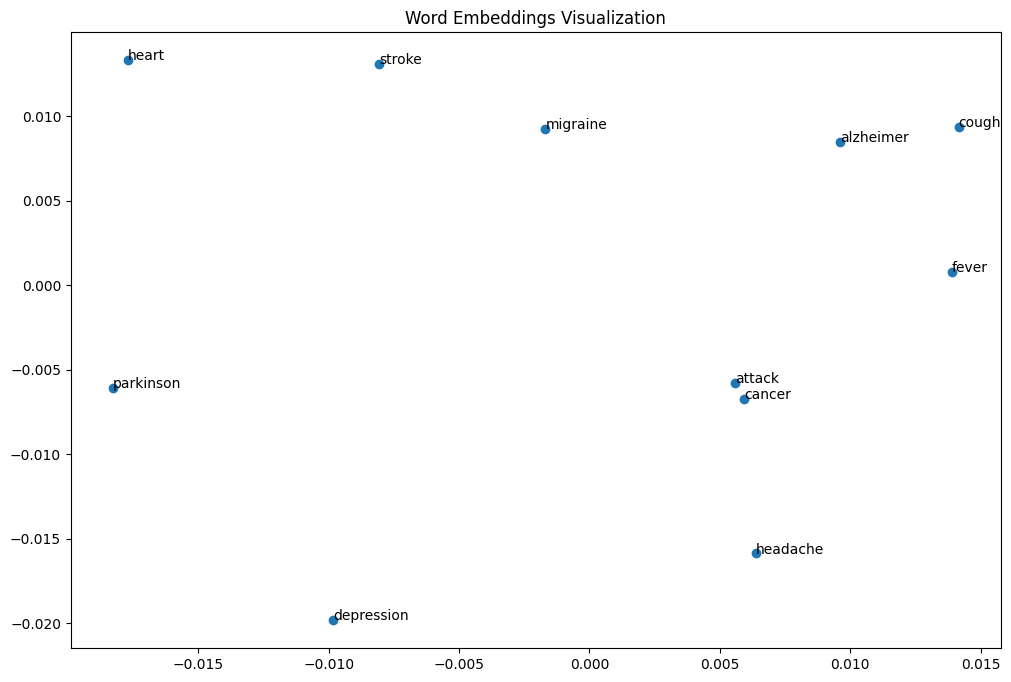

In [8]:
from gensim.models import Word2Vec

# Tokenize the data for Word2Vec
tokenized_data = [tokenize(text) for text in data['DiseaseKeyword']]

# Train Word2Vec model
model = Word2Vec(tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Visualize embeddings using PCA (if needed)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get word vectors
words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("Word Embeddings Visualization")
plt.show()


# Question 4 (20 Points)
Create your own training and evaluation data for sentiment analysis.
You don't need to write program for this question!
For example, if you collected a movie review or a product review data, then you can do the following steps:
Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment
(positive, negative, or neutral).
Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text,
sentiment), upload the csv file to GitHub and submit the file link blew.
This datset will be used for assignment four: sentiment analysis and text classification.

In [9]:
import pandas as pd

# Sample data for illustration purposes; replace with your actual dataset
data = {
    "document_id": [1, 2, 3, 4, 5],
    "clean_text": [
        "I loved this movie! The storyline was fantastic.",
        "The product quality was terrible and not worth the price.",
        "The movie was okay, nothing special but not bad.",
        "Amazing service and great value for money!",
        "The delivery was late, and the item was damaged."
    ],
    "sentiment": ["positive", "negative", "neutral", "positive", "negative"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "sentiment_data.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' created successfully with the following data:\n")
print(df)


CSV file 'sentiment_data.csv' created successfully with the following data:

   document_id                                         clean_text sentiment
0            1   I loved this movie! The storyline was fantastic.  positive
1            2  The product quality was terrible and not worth...  negative
2            3   The movie was okay, nothing special but not bad.   neutral
3            4         Amazing service and great value for money!  positive
4            5   The delivery was late, and the item was damaged.  negative


# Mandatory Question
Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your
opinion on the provided time to complete the assignment

In [ ]:
# I found the assignment both challenging and enjoyable. The hands-on experience with NLP concepts like N-grams, TF-IDF, and word embeddings was particularly enlightening. I appreciated the opportunity to implement these techniques from scratch, which deepened my understanding of their mechanics. However, I faced challenges with the implementation details, especially in constructing the TF-IDF matrix and ensuring the cosine similarity calculations were accurate. Overall, I believe the time allocated for the assignment was adequate, but more examples or guidance on the coding aspects could have enhanced the learning experience